In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def getDf():
    files = {}
    for size in [1500000, 1900000, 2500000, 2900000, 3500000, 3900000 ]:
        with open("../result/resultRustOwnerType_init_true_{}.txt".format(size), "r") as f:
            files["size{}".format(size)] = [s.strip().split("#") for s in f.readlines()]

    dfs = {}
    for k in files.keys():
        df = pd.DataFrame(files[k])
        new_header = df.iloc[0]
        df = df[1:]
        df.columns = new_header
        dfs[k] = df
    data = dfs['size1500000']
    for s in [1900000, 2500000, 2900000, 3500000, 3900000]:
        data = pd.concat([data, dfs["size{}".format(s)]])
    data = data.astype({"datastructure": str,"init": str , "size": int, "field": str, "createtime":int,  \
                        'accesstime': int,"totaltime": int})
    return data

In [6]:
df = getDf()

In [7]:
df.head()

,datastructure,init,size,field,createtime,accesstime,totaltime
1,[RustVector],true,1500000,"""own""",436,12745,14874
2,[RustVector],true,1500000,"""own""",310,11258,13244
3,[RustVector],true,1500000,"""own""",313,11269,13236
4,[RustVector],true,1500000,"""own""",309,12031,13990
5,[RustVector],true,1500000,"""own""",312,9468,11418


In [8]:
df_avg = df.groupby(["size", "field"]).mean().reset_index()

In [9]:
df_avg

,size,field,createtime,accesstime,totaltime
0,1500000,"""own""",336.0,11354.2,13352.4
1,1500000,"""reference""",98.4,10276.8,12031.0
2,1500000,"""slice""",166.6,9261.6,11107.2
3,1900000,"""own""",397.8,11702.4,14229.4
4,1900000,"""reference""",124.8,12120.0,14345.6
5,1900000,"""slice""",211.8,13078.2,15469.6
6,2500000,"""own""",518.2,16419.6,19729.8
7,2500000,"""reference""",165.0,17917.4,20898.0
8,2500000,"""slice""",278.0,16106.2,19229.4
9,2900000,"""own""",600.2,19728.8,23610.0


In [10]:
def autolabel(rects, ax):
    """Attach a text label above each bar in *rects*, displaying its height."""
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, round(height, 3)),
                    xytext=(0, 3),  # 3 points vertical offset
                    textcoords="offset points",
                    ha='center', va='bottom', fontsize = 12)

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.
The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


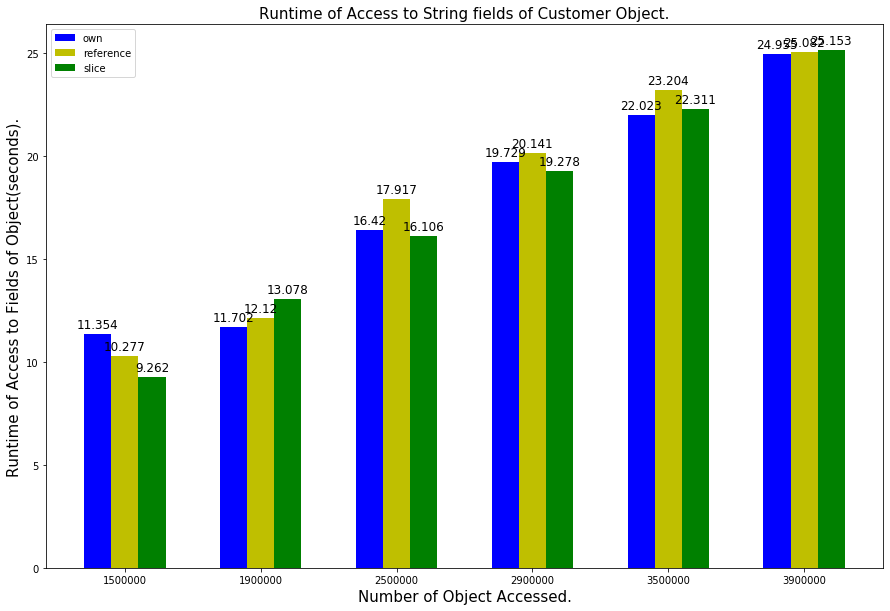

In [11]:
own = df_avg[df_avg["field"] == '"own"']
reference = df_avg[df_avg["field"] == '"reference"']
slice_type = df_avg[df_avg["field"] == '"slice"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w, round(own["accesstime"] / 1000, 3), width = w, color ='b', align = 'center')
b2 = ax.bar(idx , round(reference["accesstime"] / 1000, 3), width = w, color ='y', align = 'center')
b3 = ax.bar(idx + w, round(slice_type["accesstime"] / 1000, 3), width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of Access to Fields of Object(seconds).", fontsize = 15)
ax.set_title("Runtime of Access to String fields of Customer Object.", fontsize = 15)
autolabel(b1, ax)
autolabel(b2, ax)
autolabel(b3, ax)
ax.legend((b1, b2, b3), ("own", "reference", "slice"))
#ax.set_yscale('log')
fig.savefig("rust_different_insertion_init.eps")
#fig.savefig("rust_borrowing.png")
plt.show()

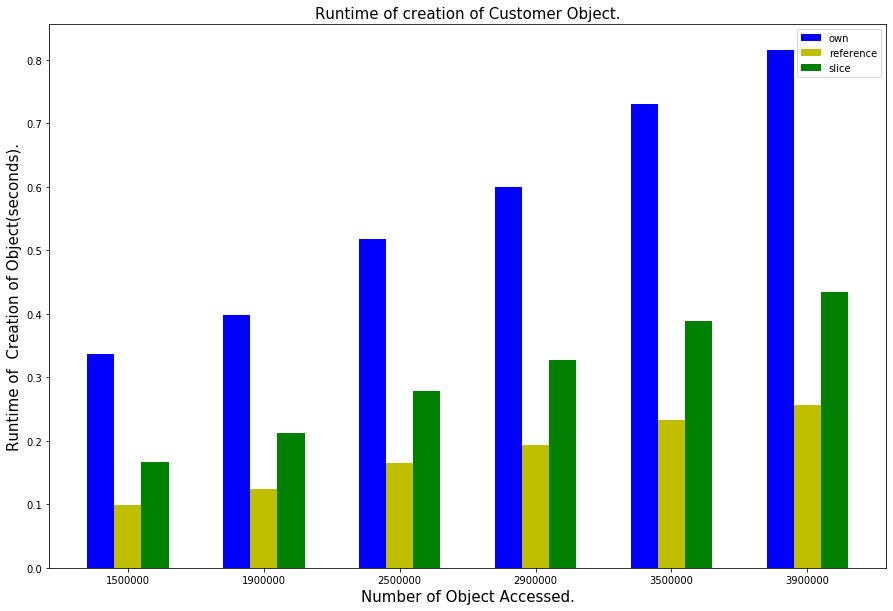

In [12]:
own = df_avg[df_avg["field"] == '"own"']
reference = df_avg[df_avg["field"] == '"reference"']
slice_type = df_avg[df_avg["field"] == '"slice"']
fig, ax = plt.subplots(figsize = (15, 10))
w = 0.2
idx = np.arange(df_avg['size'].nunique())
b1 = ax.bar(idx - w, own["createtime"] / 1000, width = w, color ='b', align = 'center')
b2 = ax.bar(idx , reference["createtime"] / 1000, width = w, color ='y', align = 'center')
b3 = ax.bar(idx + w, slice_type["createtime"] / 1000, width = w, color ='g', align = 'center')
label = np.sort(df_avg['size'].unique())
ax.set_xticks(idx)
ax.set_xticklabels(label)
ax.set_xlabel("Number of Object Accessed.", fontsize = 15)
ax.set_ylabel("Runtime of  Creation of Object(seconds).", fontsize = 15)
ax.set_title("Runtime of creation of Customer Object.", fontsize = 15)
ax.legend((b1, b2, b3), ("own", "reference", "slice"))
#ax.set_yscale('log')
#fig.savefig("rust_different_insertion_noinit.eps")
#fig.savefig("rust_borrowing.png")
plt.show()

##### 